## Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from PyQt5 import Qt as qt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score

sns.set()

pd.set_option('display.colheader_justify', 'center')
pd.set_option("display.max_columns", 20)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

## Data Understanding

* Dataset from Kaggle, seems already cleaned. Must check first
* Source: https://www.kaggle.com/arshid/iris-flower-dataset

## Data Preprocessing

In [3]:
df_iris =pd.read_csv('iris_dataset.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df_iris.copy()
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [6]:
df.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

In [7]:
x = df.drop(['Species'],axis=1)
y = df['Species']
x,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0         5.1            3.5           1.4            0.2    
 1         4.9            3.0           1.4            0.2    
 2         4.7            3.2           1.3            0.2    
 3         4.6            3.1           1.5            0.2    
 4         5.0            3.6           1.4            0.2    
 ..             ...           ...            ...           ...
 145       6.7            3.0           5.2            2.3    
 146       6.3            2.5           5.0            1.9    
 147       6.5            3.0           5.2            2.0    
 148       6.2            3.4           5.4            2.3    
 149       5.9            3.0           5.1            1.8    
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Ir

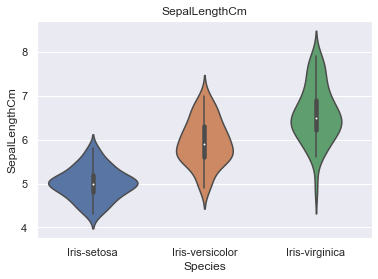

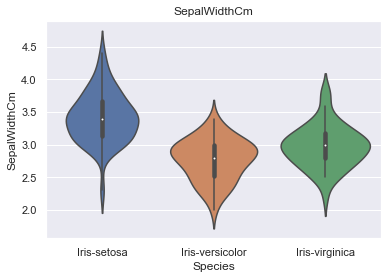

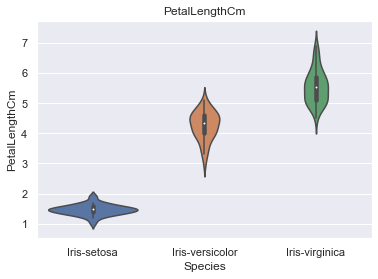

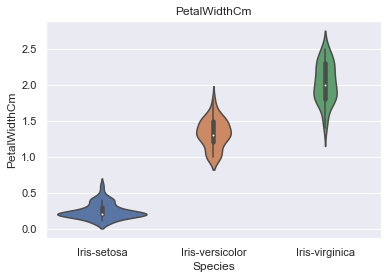

In [8]:
for col in x:
    sns.violinplot(y=x[col],x=y)
    plt.title(col)
    plt.show()

## Modelling

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [10]:
pipelines = {
    'rfc':make_pipeline(RandomForestClassifier(random_state=1234)),
    'gbc':make_pipeline(GradientBoostingClassifier(random_state=1234)),
    'lr':make_pipeline(LogisticRegression(random_state=1234)),
}

pipelines

{'rfc': Pipeline(steps=[('randomforestclassifier',
                  RandomForestClassifier(random_state=1234))]),
 'gbc': Pipeline(steps=[('gradientboostingclassifier',
                  GradientBoostingClassifier(random_state=1234))]),
 'lr': Pipeline(steps=[('logisticregression', LogisticRegression(random_state=1234))])}

In [11]:
fit_models = {}
for model,algo in pipelines.items():
    print("Algo {} have been Fitted".format(model.upper()))
    fit_models[model] = algo.fit(x_train,y_train)

Algo RFC have been Fitted
Algo GBC have been Fitted
Algo LR have been Fitted


## Evaluation

In [12]:
cm_models = {}

for model,algo in fit_models.items():
    print ('Confusion Matrix for {} Model'.format(model.upper()))
    print(confusion_matrix(y_test,algo.predict(x_test)))
    cm_models[model] = confusion_matrix(y_test,algo.predict(x_test))

Confusion Matrix for RFC Model
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix for GBC Model
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Confusion Matrix for LR Model
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [13]:
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for model,matrix in cm_models.items():
    print ('\n-------- Confusion Matrix DataFrame for {} --------\n'.format(model.upper()))
    print (pd.DataFrame(data=matrix, columns=['Predicted ' + t for t in target], index=['True ' + t for t in target]))


-------- Confusion Matrix DataFrame for RFC --------

                      Predicted Iris-setosa  Predicted Iris-versicolor  Predicted Iris-virginica
True Iris-setosa               11                        0                          0           
True Iris-versicolor            0                       12                          1           
True Iris-virginica             0                        0                          6           

-------- Confusion Matrix DataFrame for GBC --------

                      Predicted Iris-setosa  Predicted Iris-versicolor  Predicted Iris-virginica
True Iris-setosa               11                        0                          0           
True Iris-versicolor            0                       12                          1           
True Iris-virginica             0                        0                          6           

-------- Confusion Matrix DataFrame for LR --------

                      Predicted Iris-setosa  Predicted Iris-

In [4]:
df_results = pd.DataFrame(columns=["Prediction Rate",'Misclassification Rate'], index=['RFC','GBC','LR'])

In [8]:
idx = 0

for model,algo in fit_models.items():
    df_results.iloc[idx,0] = accuracy_score(y_test,algo.predict(x_test))
    df_results.iloc[idx,1] = abs(accuracy_score(y_test,algo.predict(x_test))-1)
    idx += 1
    print ('{} : {} | {}'.format(model, accuracy_score(y_test,algo.predict(x_test)),abs(accuracy_score(y_test,algo.predict(x_test))-1)))

df_results

,Prediction Rate,Misclassification Rate
RFC,0.97,0.03
GBC,0.97,0.03
LR,0.97,0.03


In [70]:
for model in fit_models:
    print ('\n -------- {} : Target Probability --------\n'.format(model.upper()))
    print (pd.DataFrame(np.vectorize(lambda x:"{:.2f}".format(x))(fit_models[model].predict_proba(x_test)), columns=target))


 -------- RFC : Target Probability --------

   Iris-setosa Iris-versicolor Iris-virginica
0      0.96          0.04           0.00     
1      0.00          0.98           0.02     
2      0.00          1.00           0.00     
3      1.00          0.00           0.00     
4      0.00          0.01           0.99     
5      0.00          0.90           0.10     
6      0.00          0.03           0.97     
7      1.00          0.00           0.00     
8      1.00          0.00           0.00     
9      0.00          0.01           0.99     
10     0.00          1.00           0.00     
11     1.00          0.00           0.00     
12     0.00          0.00           1.00     
13     0.00          0.98           0.02     
14     0.00          1.00           0.00     
15     1.00          0.00           0.00     
16     0.00          1.00           0.00     
17     0.00          0.99           0.01     
18     0.99          0.01           0.00     
19     1.00          0.00         

In [63]:
pd.DataFrame(fit_models['lr'].predict_proba(x_test), columns=target)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,9.85e-01,0.02,2.15e-08
1,2.78e-01,0.72,2.64e-03
2,6.20e-03,0.89,1.05e-01
3,9.86e-01,0.01,6.26e-08
4,1.13e-06,0.02,9.81e-01
5,4.44e-03,0.63,3.67e-01
6,1.43e-04,0.13,8.72e-01
7,9.58e-01,0.04,1.22e-06
8,9.70e-01,0.03,3.03e-07
9,9.46e-06,0.03,9.73e-01


## Deployment

In [21]:
for model,algo in fit_models.items():
    joblib.dump(algo,'iris_'+model+'.pkl')
    print ('{} has been saved'.format(model.upper()))

RFC has been saved
GBC has been saved
LR has been saved
